YOUTUBE SENTIMENT ANALISYS

In [1]:
#Import module

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Open data

df = pd.read_csv(r'D:\Udemy\Project Data Analyst\Sentiment Analysis/UScomments.csv', error_bad_lines=False)

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\zydd\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#print top 5 data

df.head(5)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [4]:
#check how much data empty per column

df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
#delet row who have empty value

df.dropna(inplace=True)

In [6]:
#install TextBlob module for get Polarity and Subjectivity

!pip install textblob

In [7]:
#import textblob

from textblob import TextBlob as tb

#test textblob from comments

tb('i love henn so much').sentiment


Sentiment(polarity=0.35, subjectivity=0.4)

In [8]:
#create new column with polarity
#tips: always use try and except for big processing data

polarity=[]
for comment in df['comment_text']:
    try:
        polarity.append(tb(comment).sentiment.polarity)
    except:
        print("wtf just happened?")

df['polarity'] = polarity
df.head(10)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [9]:
#create new column with subjectivity
#tips: always use try and except for big processing data

subjectivity=[]
for comment in df['comment_text']:
    try:
        subjectivity.append(tb(comment).sentiment.subjectivity)
    except:
        print("wtf just happened?")

df['subjectivity'] = subjectivity
df.head(10)

,video_id,comment_text,likes,replies,polarity,subjectivity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000,0.100000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000,0.100000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000,1.000000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714,0.507143


In [10]:
#create new column for identification positive and negative sentiment from value of polarity

def getSentiment(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Netral'
    else :
        return 'Positive'
# Apply the function
df['Sentiment'] = df['polarity'].apply(getSentiment)

df.head(10)
    

,video_id,comment_text,likes,replies,polarity,subjectivity,Sentiment
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000,0.100000,Netral
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000,0.100000,Netral
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000,0.000000,Netral
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000,0.000000,Netral
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000,0.000000,Netral
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000,0.000000,Netral
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000,0.000000,Netral
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000,0.000000,Netral
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000,1.000000,Positive
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714,0.507143,Negative


In [11]:
#create wordcloud

!pip install WORDCLOUD

In [12]:
#import wordcloud

from wordcloud import WordCloud, STOPWORDS

#make blank space to each of words
#Negative

negative_comment = df[df['polarity']<0]
sentiment_negative = ' '.join(negative_comment['comment_text'])

#Positive

positive_comment = df[df['polarity']>0]
sentiment_positive = ' '.join(positive_comment['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

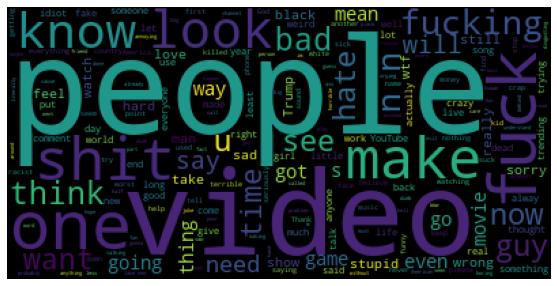

In [13]:
#wordcloud of negative sentiment
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(sentiment_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

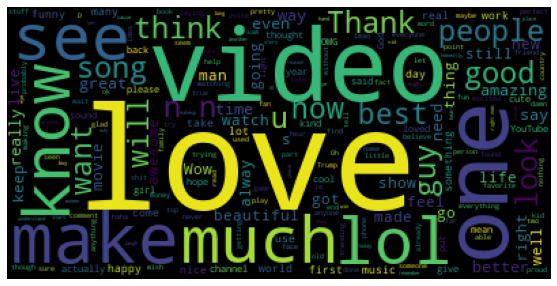

In [14]:
#wordcloud of negative sentiment
wordcloud=WordCloud(stopwords=set(STOPWORDS)).generate(sentiment_positive)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [15]:
#analysis the emoji comments
#install module firs

!pip install emoji

#Import module

import emoji

#import module encounter

# import counter to sum each emoji
from collections import Counter

In [16]:
#check emoji in each comment

#create list emoji

list_emoji = []

for comment in df['comment_text']:
    for char in comment:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            list_emoji.append(char)

#check how much emoji

len(list_emoji)

# check list of emoji
list_emoji[0:5]

<ipython-input-16-ad15c72b220b>:9: DeprecationWarning: 'emoji.UNICODE_EMOJI_ENGLISH' is deprecated and will be removed in version 2.0.0. Use 'emoji.EMOJI_DATA' instead.
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  if char in emoji.UNICODE_EMOJI_ENGLISH:


['‼', '‼', '‼', '😉', '😭']

In [17]:
#check top 5 emoji
Counter(list_emoji).most_common(5)

[('😂', 36987), ('😍', 33453), ('❤', 31119), ('🔥', 8694), ('😭', 8398)]

In [18]:
#store value top 5 emoji

emojis = [Counter(list_emoji).most_common(10)[i][0] for i in range(5)]

print(emojis)

freq = [Counter(list_emoji).most_common(10)[i][1] for i in range(5)]

print(freq)


['😂', '😍', '❤', '🔥', '😭']
[36987, 33453, 31119, 8694, 8398]


In [19]:
#let's visualize the emoji value

#install module

!pip install plotly

#import module

import plotly.graph_objs as go
from plotly.offline import iplot

In [20]:
#create bar plot

viz = go.Bar(x=emojis, y=freq)
iplot([viz])

Another Analysis From Random Video Each Country

In [21]:
#import modul to access internal directory
import os

In [22]:
#store path file

path = r'D:\Udemy\Project Data Analyst\Sentiment Analysis\additional_data'

files=os.listdir(path)

files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [23]:
#store csv file

files_csv = [files[i] for i in range(0, len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [24]:
#concate all file csv and create new column with code country

df = pd.DataFrame()

for file in files_csv:
    new_df = pd.read_csv(path+'/'+file, encoding='iso-8859-1',error_bad_lines=False)
    
    new_df['country'] = file.split('.')[0][0:2]
    df = pd.concat([df,new_df])

df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [25]:
#open category file

category = pd.read_csv(r'D:\Udemy\Project Data Analyst\Sentiment Analysis/category_file.txt', sep=":")

category.head(5)


,Category_id,Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [26]:
#make category_id being index

category.keys()
category.set_index('Category_id', inplace=True)
category.head(5)


,Category_name
Category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [27]:
#create new column category name and conver category_id to category_name (vlookup)

dict_category = category.to_dict()
dict_category.keys()
df['category_name'] = df['category_id'].map(dict_category['Category_name'])

df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

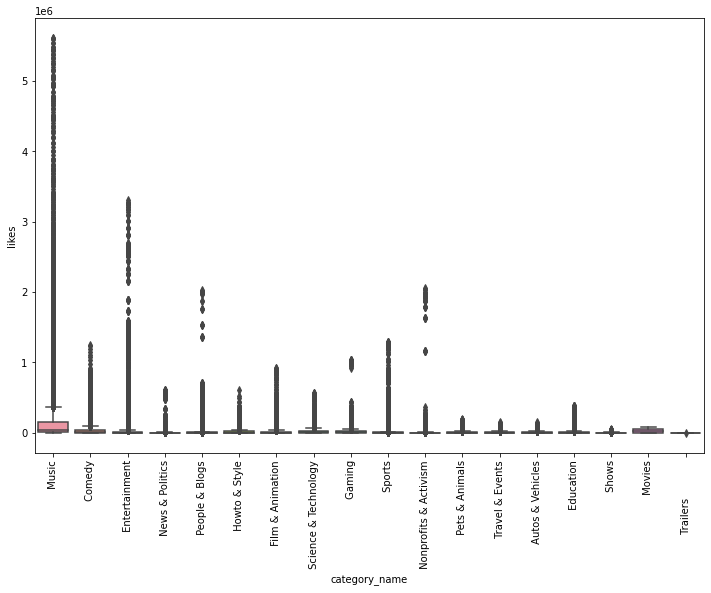

In [28]:
#create visualize with boxplot

plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data = df)
plt.xticks(rotation='vertical')

Let's analyst like,comment, and dislike

In [29]:
#store percentage of value like, dislike, comment

df['likes_rate'] = df['likes']/df['views']*100
df['dislikes_rate'] = df['dislikes']/df['views']*100
df['comments_rate'] = df['comment_count']/df['views']*100

df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,likes_rate,dislikes_rate,comments_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

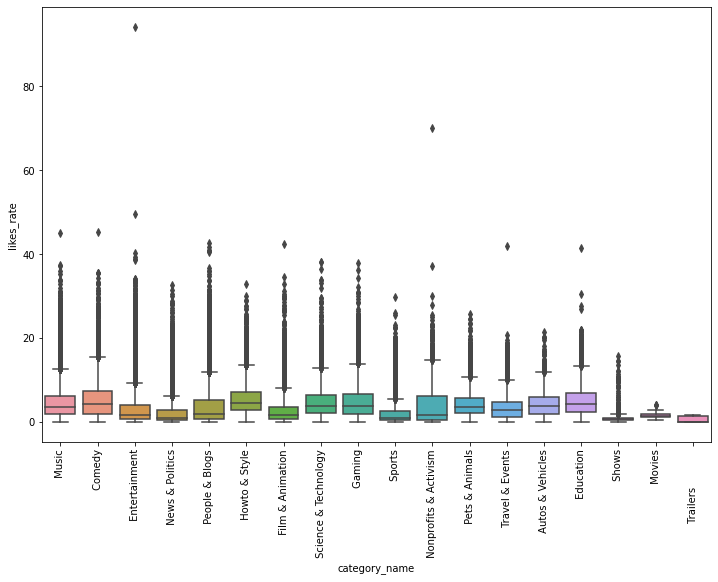

In [30]:
#create visualize likes rate

plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes_rate', data = df)
plt.xticks(rotation='vertical')

Is views impact the likes count?

<AxesSubplot:xlabel='views', ylabel='likes'>

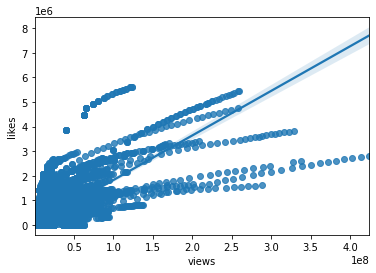

In [31]:
#create visualize between views_rate and likes_reg using regplot

sns.regplot(data = df, x= 'views', y= 'likes')

<AxesSubplot:>

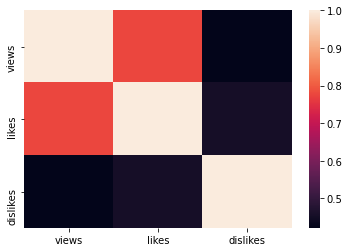

In [32]:
#show the correlation with heatmap visualize

sns.heatmap(df[['views','likes','dislikes']].corr())

Let analyst the most channel upload video

In [33]:
#store group by of channel_title and count videos uploaded

most_up = df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total_videos'})

In [34]:
#import plotly to visualize the bar chart

import plotly.express as px

# show top 20 channel 
px.bar(data_frame= most_up[0:20], x= 'channel_title', y= 'total_videos')

Let's try with punctuation is impact on our analysis?

In [35]:
# import module

import string

#show the punctuation

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
#create function to count punctuation

def punct_count(x):
    return len([c for c in x if c in string.punctuation])

In [37]:
#test function

text= 'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'
punct_count(text)

4

In [38]:
#Apply funcion in our dataframe

df['punct_count']= df['title'].apply(punct_count)
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name,likes_rate,dislikes_rate,comments_rate,punct_count
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music,4.589104,0.253051,0.733639,4
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy,12.594873,0.166363,1.284185,1
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy,4.575843,0.167292,0.256342,3


In [39]:
#check correlation between punct and views
#the result show 2 varible have correlation

df['punct_count'].corr(df['views'])

# 0 - 0.5 -> low correlation
#the more viewers the number of comments using punctuation also increases

0.046262236962134634